In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report



In [2]:
data= pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.shape

(614, 13)

In [5]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
data.drop(['Loan_ID'],axis=1,inplace=True)

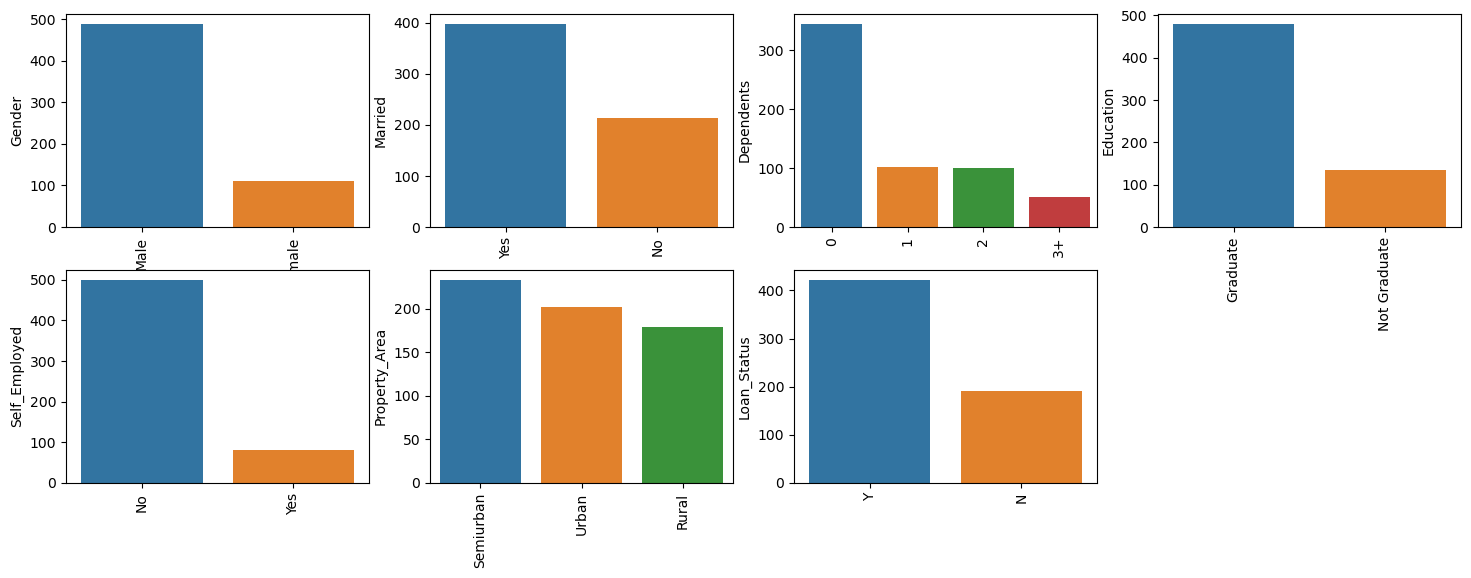

In [9]:
obj= (data.dtypes== 'object')
object_cols= list(obj[obj].index)
plt.figure(figsize=(18,36))
index=1
for col in object_cols:
    y= data[col].value_counts()
    plt.subplot(11,4,index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index),y=y)
    index+=1
plt.show()

In [10]:
lab_enc= LabelEncoder()

In [11]:
obj=(data.dtypes=='object')
for col in list(obj[obj].index):
    data[col]= lab_enc.fit_transform(data[col])

In [12]:
data.dtypes

Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [13]:
data.isna().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
for col in data.columns:
    data[col] = data[col].fillna(data[col].mean())
data.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:>

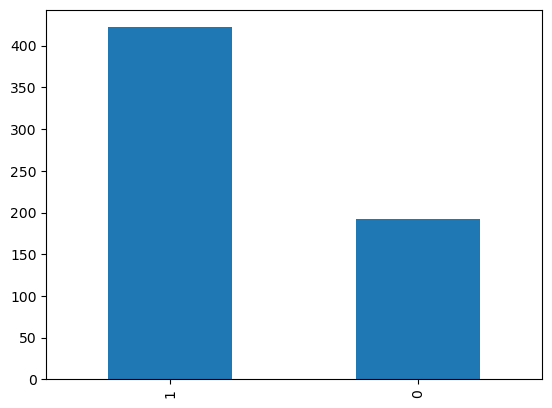

In [15]:
data['Loan_Status'].value_counts().plot.bar()

422 out of 614 people got the approval.

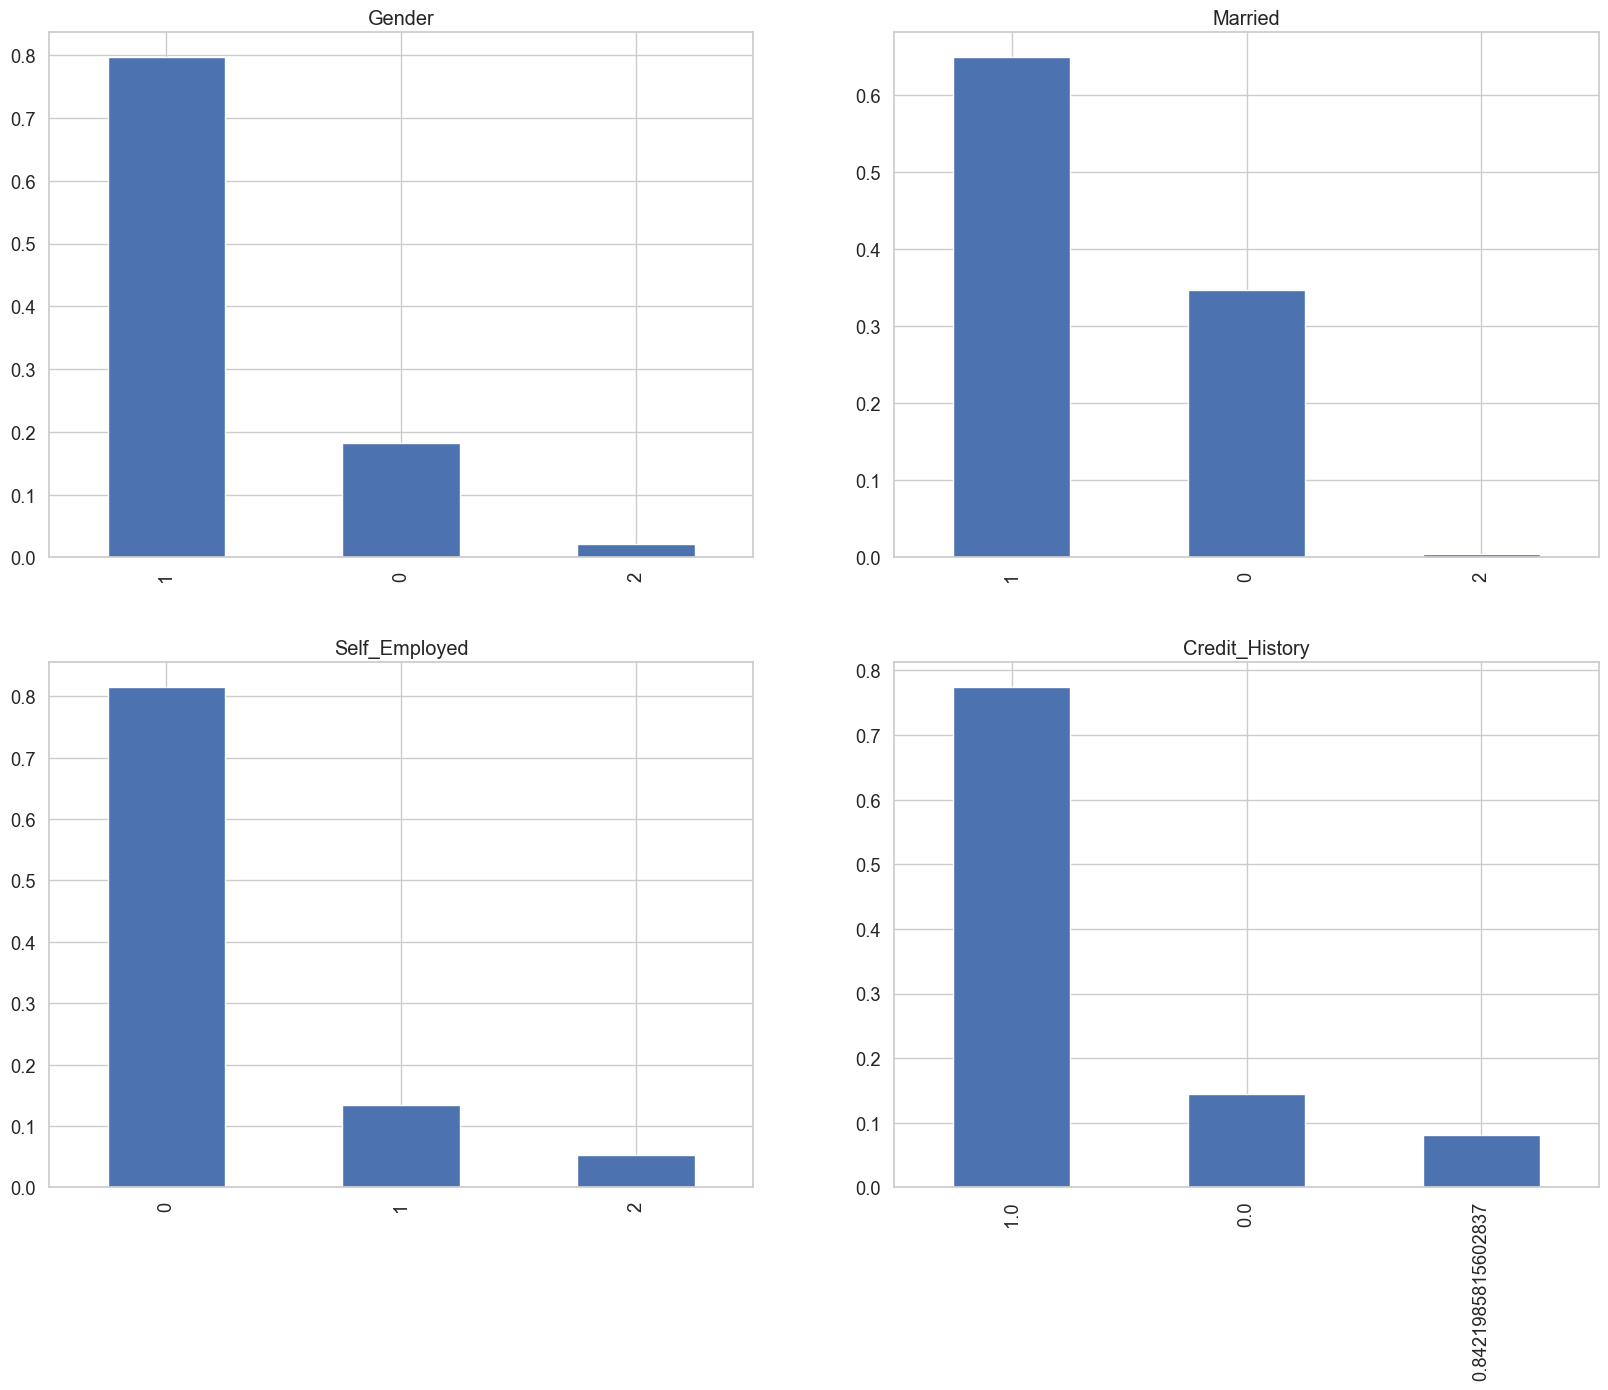

In [16]:
sns.set(style='whitegrid',font_scale=1.2)
plt.subplots(figsize=(20,15))
plt.subplot(2,2,1)
data['Gender'].value_counts(normalize=True).plot.bar(title='Gender')
plt.subplot(2,2,2)
data['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.subplot(2,2,3)
data['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.subplot(2,2,4)
data['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')
plt.show()

The above bar graph shows here that,
around 80% of the applicants are male,
approx. 67% of the applicants are married,
approx. 15% are self-employed,
and approx 85% of the applicants have repaid.

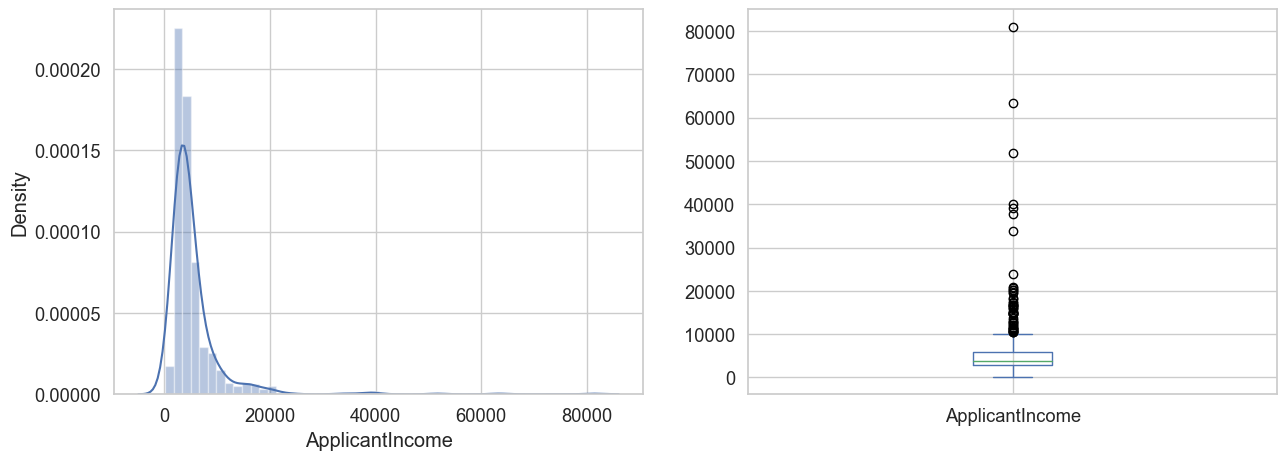

In [17]:
sns.set(style='whitegrid', font_scale=1.2)
plt.subplot(1,2,1)
sns.distplot(data['ApplicantIncome']);
plt.subplot(1,2,2)
data['ApplicantIncome'].plot.box(figsize=(15,5))
plt.show()

It is not normally distributed.

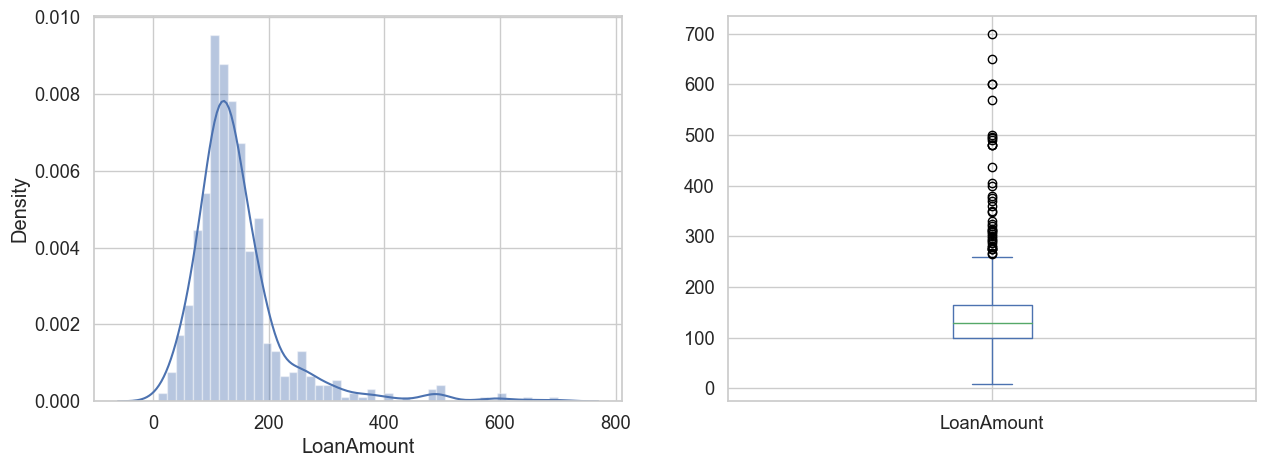

In [18]:
plt.subplot(1,2,1)
sns.distplot(data['LoanAmount']);
plt.subplot(1,2,2)
data['LoanAmount'].plot.box(figsize=(15,5))
plt.show()

It is normally distributed with a lot of outliers.

<AxesSubplot:xlabel='Gender'>

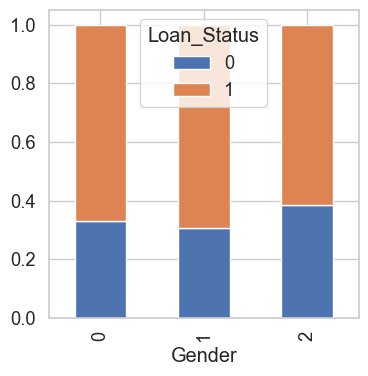

In [19]:
Gender= pd.crosstab(data['Gender'],data['Loan_Status'])
Gender.div(Gender.sum(1).astype(float),axis=0).plot.bar(stacked= True,figsize=(4,4))

The ratio of male and female applicants are almost same for approved as well as non approved loans.

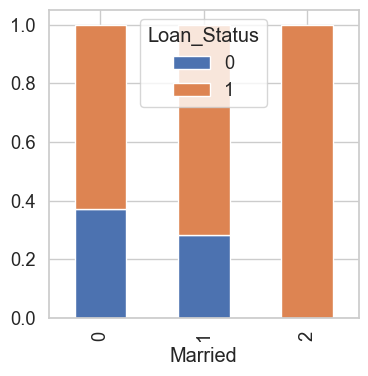

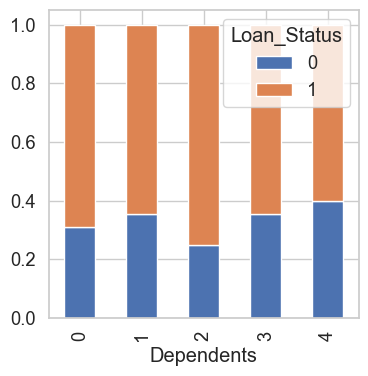

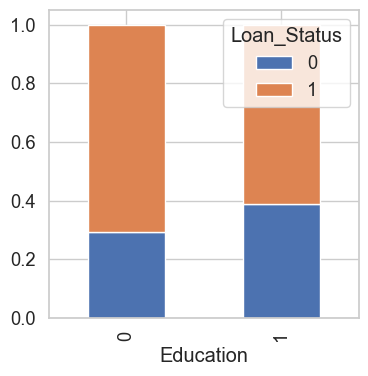

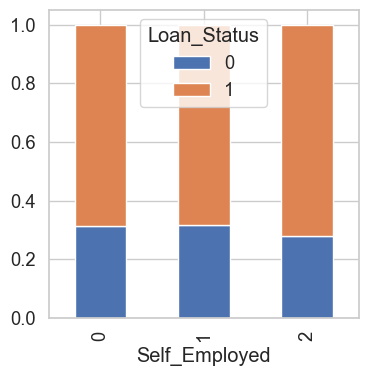

In [20]:
Married= pd.crosstab(data['Married'],data['Loan_Status'])
Married.div(Married.sum(1).astype(float),axis=0).plot.bar(stacked=True,figsize=(4,4))
Dependents= pd.crosstab(data['Dependents'],data['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot.bar(stacked=True,figsize=(4,4))
Education= pd.crosstab(data['Education'],data['Loan_Status'])
Education.div(Education.sum(1).astype(float),axis=0).plot.bar(stacked=True,figsize=(4,4))
Self_Employed= pd.crosstab(data['Self_Employed'],data['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot.bar(stacked=True,figsize=(4,4))
plt.show()

The approved loan for married applicants is more than that of unmarried applicants.
The loan status for dependents applicants with 1 and 3+ is same.
Loan approval for graduate applicants is more as compared to that of non graduates.
The loan status is same for self employed applicants and those are not self employed.

<AxesSubplot:xlabel='Property_Area'>

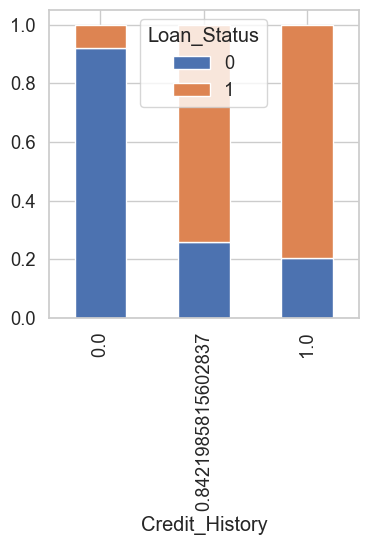

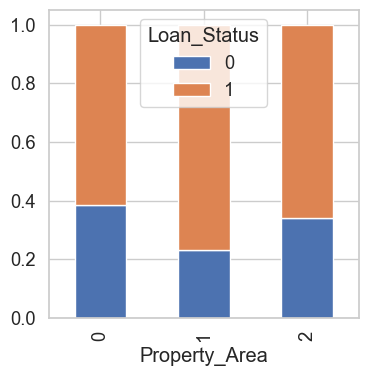

In [21]:
Credit_History= pd.crosstab(data['Credit_History'],data['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot.bar(stacked=True,figsize=(4,4))
Property_Area= pd.crosstab(data['Property_Area'],data['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot.bar(stacked=True,figsize=(4,4))

The applicant with credit of 1 has more loan approvals.The semiurban applicants have more loan approvals than that of urban or rural applicants.

In [22]:
X= data.drop(['Loan_Status'],axis=1)
Y= data['Loan_Status']
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.4,random_state=1)

#FOR TRAINING SCORE

In [23]:
log_reg= LogisticRegression()
knn= KNeighborsClassifier()
rfc= RandomForestClassifier()

for cls in(log_reg, knn, rfc):
    cls.fit(X_train,Y_train)
    Y_pred= cls.predict(X_train)
    print("\n===Train Result===")
    print("Accuracy Score is = ",cls.__class__.__name__,100*accuracy_score(Y_train,Y_pred))


===Train Result===
Accuracy Score is =  LogisticRegression 82.88043478260869

===Train Result===
Accuracy Score is =  KNeighborsClassifier 75.81521739130434

===Train Result===
Accuracy Score is =  RandomForestClassifier 100.0


#FOR TESTING SCORE

In [24]:
for cls in(log_reg, knn, rfc):
    cls.fit(X_train, Y_train)
    Y_pred= cls.predict(X_test)
    print("\n===Test Result===")
    print("Accuracy Score is= ",cls.__class__.__name__,100*accuracy_score(Y_test,Y_pred))


===Test Result===
Accuracy Score is=  LogisticRegression 78.86178861788618

===Test Result===
Accuracy Score is=  KNeighborsClassifier 63.82113821138211

===Test Result===
Accuracy Score is=  RandomForestClassifier 77.23577235772358


We got the best accuracy using Random Forest Classifier and Logistic Regression with an accuracy score of 77% and 79% approximately for the testing data.